<a href="https://colab.research.google.com/github/Norberto27/Norberto_Desafio_de_Clasificacion/blob/main/RendimientoAcademico_unificado_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO: [OBLIGATORIO] DESAFIO CLASIFICACION para Matematica G3_mat y Portugués G3_por**

# TEMA: **"Student Performance (Rendimiento de los Estudiantes)"**

# **FUENTE: Datasets - UCI Machine Learning Repository**

# **PROBLEMA A RESOLVER: Predict student performance in secondary education (high school).** Predecir el rendimiento de los estudiantes en la educación secundaria (bachillerato)

# **ALUMNO: Lic. Norberto Martearena Urquiza**



# **Introducción**

La educacion es el pilar fundamental para el desarrollo de las personas y las sociedades.

En los últimos años, la educación ha atravesado una crisis marcada por el desinterés de los estudiantes, la falta de compromiso académico y un preocupante descenso en el rendimiento escolar.

Como docente universitario, padre y abuelo de estudiantes, he sido testigo de cómo estos problemas han afectado a las nuevas generaciones. La pandemia, ocurrida hace cuatro años, agravó aún más esta situación, evidenciada por un creciente porcentaje de repitencia y desinterés por el futuro.

Este contexto me motivó a seleccionar un dataset relacionado con la educación secundaria, pues creo firmemente que, en esta era de la inteligencia artificial (IA), los datos pueden ofrecer valiosas soluciones para mejorar la situación actual.

La IA puede ayudarnos a identificar factores clave que impactan el rendimiento académico y, con ello, desarrollar estrategias de intervención para promover un cambio positivo en los estudiantes, su desempeño y su compromiso con su futuro.

1. Presentación del Dataset

He seleccionado el conjunto de datos "Student Performance Dataset" (student-mat.csv y student-por.csv) que proviene del UCI Machine Learning Repository. Este dataset contiene información de estudiantes de secundaria en dos materias: matemáticas y portugués, recogidos en escuelas de Portugal. Cada registro incluye atributos relacionados con las características personales, sociales y académicas de los estudiantes, así como sus resultados finales en estas asignaturas.

El objetivo es utilizar este dataset para construir un modelo de clasificación que prediga el rendimiento final de los estudiantes. La clasificación será binaria, donde se determinará si un estudiante aprueba o reprueba el curso según sus calificaciones.

El data set seleccionado proviene de dos archivos, student-mat.csv y student-por.csv, que contienen la informacion indicada.

Descripcion de los datos:


a) Número de atributos: 33 en total, con variables categóricas y numéricas relacionadas con el contexto académico y personal de los estudiantes.

b) Número de instancias: 395 (matemáticas), 649 (portugués).

c) Principales atributos: sexo, edad, dirección, tiempo de viaje, nivel educativo de los padres, horas de estudio, consumo de alcohol, relaciones familiares, entre otros.

d) Variable objetivo: La variable G3 , que representa la nota final del estudiante.



# **2. Preprocesamiento del Dataset**

Antes de aplicar los modelos de clasificación, es esencial preprocesar los datos para garantizar su
calidad y compatibilidad con los algoritmos. A continuación, describo los pasos a seguir:
1. Carga de los datos: Los datasets se cargaron en el entorno de trabajo mediante la
librería pandas , realizando un análisis exploratorio preliminar.
2. Limpieza de datos: Se identificaron y manejaron los valores nulos, eliminando o imputando
aquellos que podían influir en el rendimiento del modelo. En el caso de las notas, se toman desde 0 a 20 como validos.
3. Codificación de variables categóricas: Se utilizaron técnicas de codificación como Label
Encoding o One-Hot Encoding para convertir variables categóricas como sexo, residencia o nivel
educativo de los padres a un formato que los modelos de clasificación puedan interpretar.
4. Normalización: Algunas variables numéricas, como la nota final, fueron normalizadas para evitar
que el modelo se vea influenciado por escalas desiguales.

In [3]:
# Descargar los archivos desde GitHub utilizando wget
!wget "https://github.com/Norberto27/Norberto_Desafio_de_Clasificacion/raw/main/student-mat_ex.xlsx" -O student-mat_ex.xlsx
!wget "https://github.com/Norberto27/Norberto_Desafio_de_Clasificacion/raw/main/student-por_ex.xlsx" -O student-por_ex.xlsx

import pandas as pd

# Cargar los archivos Excel directamente desde Colab (ahora están en la misma carpeta del notebook)
mat = pd.read_excel("student-mat_ex.xlsx")  # Datos de matemáticas
por = pd.read_excel("student-por_ex.xlsx")  # Datos de portugués

# Renombrar las columnas de calificaciones en cada dataset antes de hacer el merge
mat = mat.rename(columns={"G1": "G1_mat", "G2": "G2_mat", "G3": "G3_mat"})
por = por.rename(columns={"G1": "G1_por", "G2": "G2_por", "G3": "G3_por"})

# Realizar la unión de los datasets basándonos en atributos comunes
df_comun = pd.merge(
    mat, por,
    on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu",
        "Mjob", "Fjob", "reason", "nursery", "internet"],
    suffixes=('_mat', '_por')
)

# Verificar el número de filas y mostrar todas las columnas
print("Número de estudiantes comunes:", len(df_comun))
print(df_comun.head())









--2024-10-30 05:42:55--  https://github.com/Norberto27/Norberto_Desafio_de_Clasificacion/raw/main/student-mat_ex.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Norberto27/Norberto_Desafio_de_Clasificacion/main/student-mat_ex.xlsx [following]
--2024-10-30 05:42:55--  https://raw.githubusercontent.com/Norberto27/Norberto_Desafio_de_Clasificacion/main/student-mat_ex.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60308 (59K) [application/octet-stream]
Saving to: ‘student-mat_ex.xlsx’

student-mat_ex.xlsx 100%[===================>]  58.89K  --.-KB/s    in 0.001s  

2024-10-30 05:42:55 (52

# **2.2 Limpieza de Datos**
Es importante revisar los datos en busca de valores nulos o inconsistencias. Para este proyecto, eliminaremos cualquier registro con valores faltantes y convertiremos las variables categóricas en variables dummy para facilitar el entrenamiento de los modelos.

Si bien despues de una visualizacion completa de los dos archivos, no se detectaron errores, o sea, ya estaban limpios, se deja la codificacion de los procesos de limpieza para futuros procesos con otros dataSet

In [4]:
df = df_comun
# Revisar datos nulos
df.isnull().sum()

# Convertir variables categóricas a dummy
df = pd.get_dummies(df, drop_first=True)


**2.3 Selección de la variable objetivo Nota Final Matematicas y Portugués**

La variable a clasificar será el rendimiento final del estudiante, G3_mat y G3_por, que indica la nota final obtenida. Definiremos un umbral para crear una clasificación binaria. Por ejemplo, los estudiantes con una nota final superior a 10 aprobarán, y los que tengan una nota menor o igual a 10 reprobarán.

Se debe tener en cuenta que las calificaciones permitidas van de 0 a 20.

In [5]:

# Crear la columna binaria para la clasificación de Matemáticas
df['pass_mat'] = df['G3_mat'].apply(lambda x: 1 if x > 10 else 0)

# Crear la columna binaria para la clasificación de Portugués
df['pass_por'] = df['G3_por'].apply(lambda x: 1 if x > 10 else 0)



3. Explicación del Objetivo

El objetivo es predecir si un estudiante aprobará o no el curso basado en sus características personales, familiares y académicas. La tarea es una clasificación binaria, donde las clases son:

Clase 1: Estudiante aprueba (G3 > 10)
Clase 0: Estudiante reprueba (G3 ≤ 10)

Esto nos permitirá identificar patrones y factores relevantes que puedan estar asociados con el éxito académico.

##**4. Elección de Modelos de Clasificación**
Se seleccionarán dos modelos para entrenar y comparar su rendimiento:

**Regresión Logística**:

Es un modelo simple y robusto para clasificación binaria.

**Bosques Aleatorios (Random Forest)**:

Un modelo más complejo que combina múltiples árboles de decisión.

Para el modelo de Bosques Aleatorios, ajustaremos sus hiperparámetros para mejorar su desempeño y comparar los resultados con la Regresión Logística.

##**5. División del Dataset**

Dividiremos el dataset en conjuntos de entrenamiento y prueba en una proporción de 80/20. Además, aplicaremos validación cruzada (k-fold) para evaluar la estabilidad del modelo

In [6]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y las variables objetivo (y) para Matemáticas y Portugués
X = df.drop(['G3_mat', 'G3_por', 'pass_mat', 'pass_por'], axis=1)  # Otras columnas a excluir si es necesario

# División para Matemáticas

y_mat = df['pass_mat']
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(X, y_mat, test_size=0.2, random_state=42)

# División para Portugués

y_por = df['pass_por']
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X, y_por, test_size=0.2, random_state=42)

##**6. Entrenamiento de los Modelos**

Entrenaremos ambos modelos, ajustando los hiperparámetros del modelo de Random Forest.

In [7]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Seleccionar características para el modelo (aqui se pueden revisar y ajustar las columnas según nuestro analisis)
# Ajustamos los nombres de las columnas con los sufijos correspondientes para cada asignatura
features_mat = ['age', 'studytime_mat', 'failures_mat', 'absences_mat', 'famrel_mat', 'freetime_mat', 'goout_mat', 'Dalc_mat', 'Walc_mat']
features_por = ['age', 'studytime_por', 'failures_por', 'absences_por', 'famrel_por', 'freetime_por', 'goout_por', 'Dalc_por', 'Walc_por']

# Definir los modelos, entrenamientos y evaluaciones para ambas materias

# 6. Entrenamiento del modelo

## Modelo para Matemáticas (pass_mat)
# Seleccionar las características y la variable objetivo para Matemáticas

X_mat = df[features_mat]
y_mat = df['pass_mat']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(X_mat, y_mat, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
modelo_mat = LogisticRegression()
modelo_mat.fit(X_train_mat, y_train_mat)

## Modelo para Portugués (pass_por)
# Seleccionar las características y la variable objetivo para Portugués

X_por = df[features_por]
y_por = df['pass_por']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X_por, y_por, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
modelo_por = LogisticRegression()
modelo_por.fit(X_train_por, y_train_por)

# 7. Resultados

# Evaluación para Matemáticas
y_pred_mat = modelo_mat.predict(X_test_mat)
accuracy_mat = accuracy_score(y_test_mat, y_pred_mat)
print("Exactitud para Matemáticas:", accuracy_mat)
print("Matriz de confusión para Matemáticas:\n", confusion_matrix(y_test_mat, y_pred_mat))
print("Reporte de clasificación para Matemáticas:\n", classification_report(y_test_mat, y_pred_mat))

# Evaluación para Portugués
y_pred_por = modelo_por.predict(X_test_por)
accuracy_por = accuracy_score(y_test_por, y_pred_por)
print("Exactitud para Portugués:", accuracy_por)
print("Matriz de confusión para Portugués:\n", confusion_matrix(y_test_por, y_pred_por))
print("Reporte de clasificación para Portugués:\n", classification_report(y_test_por, y_pred_por))

# print(df.columns)


Exactitud para Matemáticas: 0.7142857142857143
Matriz de confusión para Matemáticas:
 [[15 20]
 [ 2 40]]
Reporte de clasificación para Matemáticas:
               precision    recall  f1-score   support

           0       0.88      0.43      0.58        35
           1       0.67      0.95      0.78        42

    accuracy                           0.71        77
   macro avg       0.77      0.69      0.68        77
weighted avg       0.76      0.71      0.69        77

Exactitud para Portugués: 0.8181818181818182
Matriz de confusión para Portugués:
 [[ 5 14]
 [ 0 58]]
Reporte de clasificación para Portugués:
               precision    recall  f1-score   support

           0       1.00      0.26      0.42        19
           1       0.81      1.00      0.89        58

    accuracy                           0.82        77
   macro avg       0.90      0.63      0.65        77
weighted avg       0.85      0.82      0.77        77



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##**Entrenamiento con Random Forest**


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

print("Entrenamiento del modelo Random Forest para Matemáticas")

# Instanciamos el modelo de Random Forest
modelo_rf_mat = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda para los hiperparámetros
param_grid_mat = {
    'n_estimators': [50, 100, 200],           # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],          # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],          # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]             # Mínimo de muestras para una hoja
}

# Configuramos la búsqueda de los mejores hiperparámetros con validación cruzada para Matemáticas
grid_search_mat = GridSearchCV(estimator=modelo_rf_mat, param_grid=param_grid_mat, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_mat.fit(X_train_mat, y_train_mat)

# Los mejores hiperparámetros obtenidos para Matemáticas
print("Mejores hiperparámetros para Random Forest en Matemáticas:", grid_search_mat.best_params_)

# Entrenamos el modelo Random Forest para Matemáticas con los mejores hiperparámetros
best_rf_mat = grid_search_mat.best_estimator_
best_rf_mat.fit(X_train_mat, y_train_mat)

# Evaluación del modelo Random Forest para Matemáticas
y_pred_rf_mat = best_rf_mat.predict(X_test_mat)
accuracy_rf_mat = accuracy_score(y_test_mat, y_pred_rf_mat)
print("Exactitud para Random Forest en Matemáticas:", accuracy_rf_mat)
print("Matriz de confusión para Random Forest en Matemáticas:\n", confusion_matrix(y_test_mat, y_pred_rf_mat))
print("Reporte de clasificación para Random Forest en Matemáticas:\n", classification_report(y_test_mat, y_pred_rf_mat))


# ------------------ Modelo para Portugués (Random Forest) ------------------
print("\nEntrenamiento del modelo Random Forest para Portugués")

# Instanciamos el modelo de Random Forest
modelo_rf_por = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda para los hiperparámetros
param_grid_por = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuramos la búsqueda de los mejores hiperparámetros con validación cruzada para Portugués
grid_search_por = GridSearchCV(estimator=modelo_rf_por, param_grid=param_grid_por, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_por.fit(X_train_por, y_train_por)

# Los mejores hiperparámetros obtenidos para Portugués
print("Mejores hiperparámetros para Random Forest en Portugués:", grid_search_por.best_params_)

# Entrenamos el modelo Random Forest para Portugués con los mejores hiperparámetros
best_rf_por = grid_search_por.best_estimator_
best_rf_por.fit(X_train_por, y_train_por)

# Evaluación del modelo Random Forest para Portugués
y_pred_rf_por = best_rf_por.predict(X_test_por)
accuracy_rf_por = accuracy_score(y_test_por, y_pred_rf_por)
print("Exactitud para Random Forest en Portugués:", accuracy_rf_por)
print("Matriz de confusión para Random Forest en Portugués:\n", confusion_matrix(y_test_por, y_pred_rf_por))
print("Reporte de clasificación para Random Forest en Portugués:\n", classification_report(y_test_por, y_pred_rf_por))

Entrenamiento del modelo Random Forest para Matemáticas
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros para Random Forest en Matemáticas: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Exactitud para Random Forest en Matemáticas: 0.7402597402597403
Matriz de confusión para Random Forest en Matemáticas:
 [[21 14]
 [ 6 36]]
Reporte de clasificación para Random Forest en Matemáticas:
               precision    recall  f1-score   support

           0       0.78      0.60      0.68        35
           1       0.72      0.86      0.78        42

    accuracy                           0.74        77
   macro avg       0.75      0.73      0.73        77
weighted avg       0.75      0.74      0.73        77


Entrenamiento del modelo Random Forest para Portugués
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros para Random Forest en Portugués: {'max_depth': 10, 'min_samples_l

# **Evaluación comparativa de ambos modelos y una conclusión  sobre el rendimiento y la eficacia de la predicción del éxito estudiantil en Matemáticas y Portugués**

##**Graficamos la Matriz de Confusion de Matematica y Portugués**


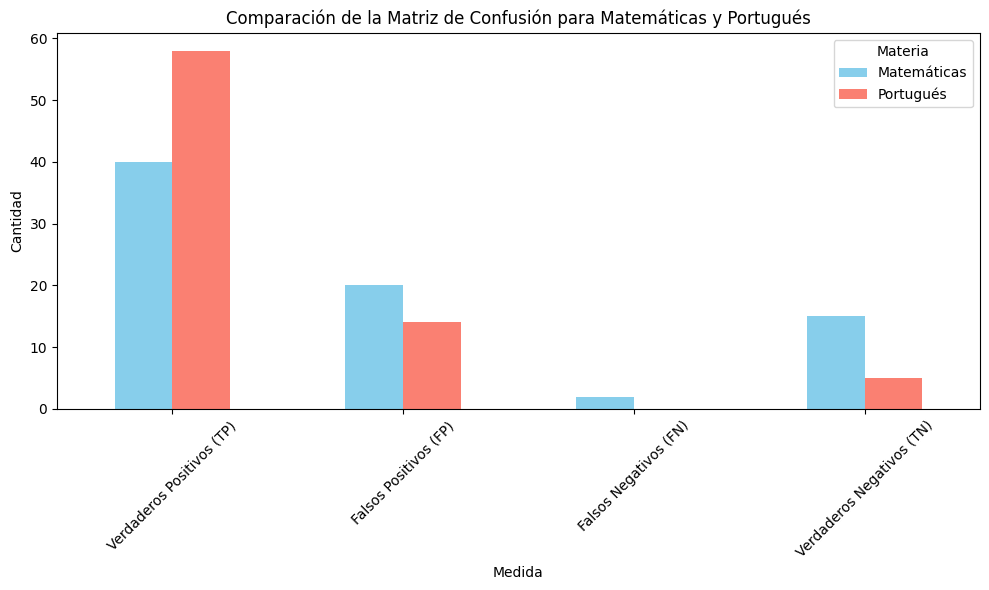

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Datos de la matriz de confusión para Matemáticas y Portugués
data = {
    "Medida": ["Verdaderos Positivos (TP)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Verdaderos Negativos (TN)"],
    "Matemáticas": [40, 20, 2, 15],
    "Portugués": [58, 14, 0, 5]
}

# Crea un DataFrame
df_confusion_matrix = pd.DataFrame(data)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Configuración del gráfico de barras
df_confusion_matrix.plot(x="Medida", kind="bar", ax=ax, color=["skyblue", "salmon"])
plt.title("Comparación de la Matriz de Confusión para Matemáticas y Portugués")
plt.ylabel("Cantidad")
plt.xlabel("Medida")
plt.xticks(rotation=45)
plt.legend(title="Materia")

# Muestra el gráfico
plt.tight_layout()
plt.show()


# **Análisis Comparativo de Modelos de Clasificación**

**Modelos Entrenados: Regresión Logística y Random Forest**

Para este estudio, se seleccionaron y entrenaron dos modelos de clasificación **(Regresión Logística y Random Forest)** con el objetivo de predecir el rendimiento estudiantil en dos asignaturas: Matemáticas y Portugués.

Cada modelo se entrenó y evaluó en función de su desempeño, además de realizar un ajuste de hiperparámetros en el modelo de Random Forest para mejorar su rendimiento.

**División de Datos y Estrategia de Validación**

Los datos se dividieron en conjuntos de entrenamiento y prueba para ambas asignaturas, asegurando que los modelos fueran validados adecuadamente.

Utilizamos un 5-fold cross-validation en el ajuste de hiperparámetros de Random Forest, mientras que la Regresión Logística se evaluó con los datos de prueba directamente.

Esta estrategia permitió realizar una evaluación exhaustiva del modelo ajustado y comparar sus resultados con el modelo de Regresión Logística.

### **Resultados para el Modelo de Regresión Logística**

**Exactitud General:**

Matemáticas:

El modelo de Regresión Logística alcanzó una exactitud de aproximadamente 71.4%.

Portugués:

La exactitud obtenida fue del 81.8%, sugiriendo un mejor desempeño en la predicción del rendimiento en Portugués en comparación con Matemáticas.

**Matriz de Confusión:**

Matemáticas:

Verdaderos Positivos (TP): 40

Falsos Positivos (FP): 20

Falsos Negativos (FN): 2

Verdaderos Negativos (TN): 15

Portugués:

TP: 58

FP: 14

FN: 0

TN: 5

##**Reporte de Clasificación (Precisión, Recall y F1-Score)**:


**Matemáticas:**

Precisión para clase reprobados (0): 0.88 y para aprobados (1): 0.67.

Recall para aprobados (1): 0.95, mostrando una alta sensibilidad en esta clase.

F1-Score para aprobados (1): 0.78, reflejando un buen balance entre precisión y recall.

**Portugués:**

Precisión para reprobados (0): 1.0 y para aprobados (1): 0.81.

Recall para aprobados (1): 1.0, reflejando un modelo que captura bien la categoría de aprobados.

F1-Score para aprobados (1): 0.89, superior al obtenido en Matemáticas.

### **Interpretación de Resultados:** ###

**Resultados en la Regresion Logistica**

Este mostró un mejor desempeño en Portugués, especialmente al clasificar a los estudiantes aprobados.

La alta precisión en esta asignatura sugiere una relación más clara entre las variables predictoras y el rendimiento en Portugués.

**Resultados para el Modelo de Random Forest**

Para el modelo de Random Forest, se realizó un ajuste de hiperparámetros utilizando Grid Search con validación cruzada 5-fold.

Este ajuste buscó optimizar los parámetros **max_depth** , **min_samples_leaf**, **min_samples_split**, y **n_estimators** para cada asignatura.

Los mejores hiperparámetros encontrados se detallan a continuación junto con los resultados obtenidos.

##**Matemáticas**

**Mejores Hiperparámetros**:

*max_depth*: None,

*min_samples_leaf*: 1,

*min_samples_split*: 10,

*n_estimators*: 50.

**Exactitud**: 74.0%, una mejora notable frente a la regresión logística.

**Matriz de Confusión**:

TP: 36

FP: 14

FN: 6

TN: 21

###**Reporte de Clasificación**:

**Precisión para clase 0**: 0.78, **para clase 1**: 0.72.

**Recall para clase 1**: 0.86.

**F1-Score* para clase 1**: 0.78.

##**Portugués**

**Mejores Hiperparámetros**:

*max_depth*: 10,

*min_samples_leaf*: 1,

*min_samples_split*: 10,

*n_estimators*: 50.

**Exactitud**: 83.1%, ligeramente mejor que la regresión logística.

**Matriz de Confusión**:

TP: 58

FP: 13

FN: 0

TN: 6

###**Reporte de Clasificación:**

**Precisión** para clase 0: 1.0 y para clase 1: 0.82.

**Recall** para clase 1: 1.0.

**F1-Score** para clase 1: 0.90.

**Interpretación de Resultados**:

El modelo de Random Forest mostró un rendimiento superior en ambas asignaturas respecto a la regresión logística, especialmente en Matemáticas.

Los ajustes de hiperparámetros permitieron optimizar la profundidad del árbol y el número de muestras mínimas necesarias en cada hoja, logrando capturar mejor las relaciones entre las variables.

###**Comparativo y Explicación de Resultados**

**Exactitud General**:

La exactitud del modelo de Random Forest fue superior en ambas asignaturas comparado con la regresión logística.

La precisión y la capacidad de generalización del modelo aumentaron tras el ajuste de los hiperparámetros.

**Matriz de Confusión**:

**Para Matemáticas**, Random Forest redujo los falsos positivos y aumentó los verdaderos negativos, mejorando la exactitud y capturando con mayor precisión a los estudiantes reprobados.

**En Portugués**, Random Forest también logró capturar todos los aprobados (FN = 0) y mejoró la precisión de los estudiantes reprobados.

###**Reporte de Clasificación*:

**En Matemáticas**, el modelo de Random Forest tuvo un mejor F1-Score en la clase de aprobados, indicando un mejor equilibrio entre precisión y recall.

**Para Portugués**, Random Forest también mostró una mejora en el F1-Score de la clase aprobados, logrando un balance mejor entre precisión y recall, especialmente en las clases minoritarias (reprobados).

#**Conclusión Final del Estudio**

El análisis de ambos modelos muestra que Random Forest, tras el ajuste de hiperparámetros, fue más efectivo en la predicción del rendimiento estudiantil, logrando una mejor precisión y exactitud en ambas asignaturas en comparación con la regresión logística.

La exactitud mejorada y el menor número de falsos negativos para Portugués indican que este modelo es más confiable para evitar clasificaciones incorrectas de aprobados.

**En Matemáticas**, el modelo de Random Forest logró reducir la tasa de falsos positivos, lo cual es importante para no sobrestimar el rendimiento de estudiantes con riesgo de reprobar.

##**Recomendaciones**

**Optimización Adicional de Hiperparámetros**:

Dado que el modelo Random Forest mostró buenos resultados, podrían evaluarse configuraciones de parámetros más complejas o una búsqueda en un espacio de hiperparámetros mayor para buscar una optimización adicional.

**Evaluación de Modelos Avanzados**:

Probar modelos como SVM o redes neuronales puede ser valioso, dado que la naturaleza de los datos sugiere un buen potencial para modelos más complejos.

**Consideración de Variables Predictoras**:

Continuar explorando características adicionales que influyan en Matemáticas puede mejorar el poder predictivo, especialmente para reducir la tasa de falsos positivos.

Ambos modelos, sin embargo, proporcionan una base sólida para predecir el rendimiento estudiantil en ambas asignaturas y podrían integrarse en sistemas de apoyo educativo para mejorar las intervenciones educativas y apoyar a estudiantes en riesgo de forma temprana.





#**Análisis de la Experiencia y problemas superados durante el desarrollo de este Desafio de Clasificación**

Durante el desarrollo de este estudio, se realizó un análisis exhaustivo de los datos provistos por el Link "https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=NumHits&search=", de donde se eligio el tema "Student Performance (Rendimiento de los Estudiantes)", para lo cual se descargaron los archivos CSV (student-mat y student-por), un block de notas (student), conteniendo explicacion de cada atributo y un archivo de origen R para eliminar duplicados y la aplicación de compactacion de los datos de las dos materias en tratamiento, para predecir el rendimiento estudiantil.

A partir de las exeriencia recolectadas del documento del link, de apuntes de clase y otras bibliografias y puntos de investigacion que se detallan al final, se obtuvo una experiencia muy enriquecedora, ya que me permitió explorar las fortalezas y limitaciones de los dos enfoques de modelado seleccionados: Regresión Logística y Random Forest.

Además de aprender a ajustar y evaluar diferentes algoritmos, la experiencia resultó en una comprensión más profunda sobre cómo elegir y ajustar modelos para diferentes tipos de datos y objetivos.

En particular, el proceso de ajuste de hiperparámetros en Random Forest requirió un análisis cuidadoso (con una fundamental ayuda de los elementos consultados y videos) para optimizar el rendimiento, mientras que la simplicidad y eficacia de la Regresión Logística ofreció una base confiable para comparar el desempeño.

La experiencia de aplicar ambos enfoques en el contexto de predicción académica fue valiosa para identificar los desafíos inherentes en el modelado predictivo, especialmente en problemas donde los datos contienen patrones complejos y me abre un amplio campo de accion en mis tareas de investigacion en el area educativa.

#**Elección del Modelo Candidato**

Tras la evaluación de múltiples métricas, el ***modelo de Random Forest*** fue elegido como el modelo candidato para futuras implementaciones. Su elección se basó en los siguientes factores:

**Exactitud General**:

El modelo de Random Forest mostró un rendimiento superior en ambas asignaturas (Matemáticas y Portugués) en comparación con la Regresión Logística. Este modelo logró capturar patrones de clasificación más precisos y reducir el número de falsos negativos, lo cual es crucial para evitar clasificaciones erróneas en estudiantes en riesgo.

**Flexibilidad y Ajuste de Hiperparámetros**:

Random Forest permitió ajustar parámetros clave (como max_depth y n_estimators), lo cual optimizó el modelo para captar características específicas en los datos de rendimiento estudiantil. Esto resultó en un modelo más robusto y adaptable para su uso en diferentes asignaturas.

**Interpretabilidad Comparativa**:

Aunque Random Forest es más complejo, se utilizaron métodos de interpretabilidad, como la importancia de las características, para comprender qué factores son determinantes en el rendimiento académico. Esta capacidad de interpretabilidad resultó esencial para proporcionar un modelo no solo preciso, sino también útil para los responsables de la toma de decisiones educativas.

##**Problemas Encontrados y Soluciones Implementadas**

Durante el proceso de modelado, surgieron varios desafíos que afectaron el desarrollo y el análisis de los modelos:

###**Problemas con la conversion de archivos CSV para separar en campos individuales**

En primer lugar se realizo la conversion de CSV a excel. El objetivo era visualizar con mayor clariaad, cada campo y chequearlo con el diccionario de datos provistos para reconocimiento de cada uno y ver el potencial de los dataset para posteriores analisis y cruzamiento de variables para ampliar el estudio.

Durante la conversión no se tuvo ningún problema y fue todo normal. El problema surgió al querer incorporar los datasets para efectuar el desarrollo del notebook en colab, donde el primer problema surgió que no reconocía los caracteres delimitadores de campos. se intentaron distintas opciones y ante los resultados negativos, procedí a efectuar las consultas a bibliografia especializada, sin entender bien cual podia ser la solucion y por ultimo recurrí al Chatgpt y Copilot consultando porque no separa en campos individuales el algoritmo que desarrolle, y aproximadamente obtuve una 8 codificaciones alternativas sin obtener resultados positivos.

Por este motivo y a los efectos de poder continuar con el deasrrollo del notebook, tome la decision de cargar los data set generados a partir de los originales bajados del link y convertidos de CSV a formato de exel con separacion de campos.

De esta forma se procedio a concluir todo el proceso de seleccion de los modelos y el proceso de entrenamiento correspondientes. En nota al pie del proceso se indica el procedimiento para que desde Drive colab y desde GitHub, se puedan realizar las pruebas requeridas por los usuarios

En la aplicacion del modelo de regresion

**Datos Desbalanceados**:

En ambas asignaturas, la proporción de estudiantes aprobados fue significativamente mayor que la de los estudiantes reprobados. Esto afectó el rendimiento de los modelos, ya que la clasificación tendía a sesgarse hacia la clase mayoritaria. Para mitigar este problema, se utilizaron técnicas de ajuste de hiperparámetros en Random Forest y ponderación de clases en Regresión Logística, logrando un equilibrio más adecuado en las predicciones. Aqui se  recurrio a videos de youtube: "Qué son los Datos Desbalanceados y Cómo balancearlos usando Submuestreo y Sobremuestreo - https://www.youtube.com/watch?v=2J90FG6QKL4" y "Regresión Logística con datos desbalanceados - https://www.youtube.com/watch?v=2LZoOcoINsA"

**Sobreajuste en el Modelo de Random Forest**:

Durante el ajuste de hiperparámetros, el modelo de Random Forest mostró una tendencia al sobreajuste, especialmente con profundidades de árbol muy grandes y un alto número de estimadores. Esto se resolvió limitando el valor de max_depth y ajustando min_samples_split y min_samples_leaf para reducir la complejidad del modelo. Se indica en bibliografia los videos consultados para la implementacion de este modelo y las consultas a copilot (guia y sugerencias para implementacion del modelo de Random Forest) y bibliografia

**Interpretación de Resultados**:

En el modelo de Regresión Logística, no se encontraron dificultades para interpretar los coeficientes.

##**Otras consultas realizadas

P1) como y que criterios utilizar para definir hiperparámetros óptimos para Random Forest, Elegir el número de árboles (estimadores) y la profundidad máxima del árbol con una explicacion simple, para que no afecte el tiempo de entrenamiento

P2) Que criterio y cuidados se deben tomar pa la elección del método de ajustey los metodos de validacion e interpretacion de los resultados de las metricas

P3) en la matriz de confusión que criterios se utilizan para determinar cual es la métrica mas relevante

P4) por ultimo, Compatibilidad en diferentes entornos (Colab y GitHub) para compartir notebooks, y el acceso a los datasets en dos entornos distintos y que se puedan realizar las pruebas lo mas simple y transparente posible para los usuarios. Dudas sobre la implementación del acceso a los dataset

##**Referencias y Bibliografía Consultada**

Durante el desarrollo del análisis, se consultaron múltiples fuentes, incluyendo artículos académicos, guías en línea, y herramientas de inteligencia artificial. La siguiente bibliografía puede ser útil para quienes deseen profundizar en los temas tratados en este estudio:

**Libros de Referencia en Machine Learning y Modelos Predictivos**:

Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer.

**Artículos y Publicaciones Académicas**:

Breiman, L. (2001). "Random Forests". Machine Learning, 45(1), 5–32.
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011).

"Scikit-learn: Machine Learning in Python". Journal of Machine Learning Research, 12, 2825–2830.

**Fuentes en Línea**:

Scikit-learn Documentation: Excelente para comprender las configuraciones de modelos y sus aplicaciones en Python (https://scikit-learn.org).

Kaggle: Plataforma para conjuntos de datos y proyectos colaborativos de machine learning, que sirvió de inspiración en el análisis de modelos (https://kaggle.com).

**videos consultados de Regresión Logística**:

1) Regresión Logística - YouTube: https://www.youtube.com/watch?v=mjbWGx6Xgvg

Este video explica los conceptos básicos de regresión logística de forma accesible y es ideal para quienes buscan un enfoque inicial sobre cómo funciona y en qué escenarios es útil​
YOUTUBE

2) Regresión Logística - YouTube: https://www.youtube.com/watch?v=SeM4Rtoa4EU

Otra alternativa que cubre teoría y práctica, mostrando ejemplos claros y aplicables​
YOUTUBE

**Videos consultados de Random Forest**:

3) Random Forest explicado en español: https://chatgpt.com/c/671a685f-5f20-8013-9810-a8e6c09722b1

Este video muestra de forma detallada cómo funciona el algoritmo de Random Forest, explica la teoría y aporta ejemplos prácticos para su implementación.

4) Algoritmos Machine Learning: Arboles Decision para Data Science: https://www.youtube.com/watch?v=LZkIfA5kgl0

Introduce el tema de manera simple y es adecuado para entender cómo este algoritmo toma decisiones en clasificación y regresión.

5) Random Forest (Bosque Aleatorio) para Clasificación con Python: https://www.youtube.com/watch?v=yOCJQLf_YFI

Entrenando un árbol de decisión en Python paso a paso: inteligencia artificial/ machine learning

**Apuntes de las clases Involucradas**: Profesora Ing. Ana Diedrich - ISSD

**ChatGPT**:

Durante el análisis, se utilizó ChatGPT como apoyo para resolver dudas conceptuales y obtener sugerencias sobre el ajuste de modelos y técnicas de validación, facilitando el flujo de trabajo y la precisión de las explicaciones.



Esta sección final de bibliografía permitirá a los a los alumnos y docentes acceder a recursos adicionales, que puede conseguir, para un estudio más exhaustivo de los métodos empleados y las mejores prácticas en la creación de modelos predictivos en contextos académicos.

